In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
#abc
# import matplotlib.pyplot as plt

# # Load dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Hiển thị một vài ảnh trong dataset
# plt.figure(figsize=(10, 5))
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(x_train[i], cmap="gray")
#     plt.axis("off")
# plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Chuẩn hóa dữ liệu (biến đổi pixel từ 0-255 về 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Thêm chiều thứ 4 để phù hợp với CNN (1 kênh màu - grayscale)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Chuyển label thành dạng one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

c:\Users\gnud1\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8383 - loss: 0.4990 - val_accuracy: 0.9868 - val_loss: 0.0438
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9783 - loss: 0.0740 - val_accuracy: 0.9882 - val_loss: 0.0363
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9854 - loss: 0.0471 - val_accuracy: 0.9911 - val_loss: 0.0292
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9894 - loss: 0.0357 - val_accuracy: 0.9919 - val_loss: 0.0279
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.9904 - loss: 0.0324 - val_accuracy: 0.9913 - val_loss: 0.0289
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9924 - loss: 0.0239 - val_accuracy: 0.9910 - val_loss: 0.0305
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9924 - val_loss: 0.0280
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9942 - loss: 0.0192 - 

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Độ chính xác trên tập test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9879 - loss: 0.0466
Độ chính xác trên tập test: 0.9911


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


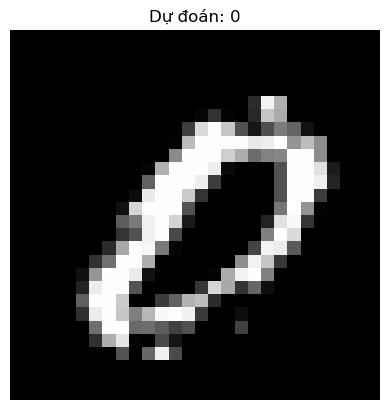

In [6]:
import random

index = random.randint(0, len(x_test))
image = x_test[index]

# Dự đoán
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

# Hiển thị kết quả
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Dự đoán: {predicted_label}")
plt.axis("off")
plt.show()

In [7]:
model.save("mnist_cnn.h5")